# Computer Vision - P4

### **Carefully read the file `README.md` as well as the following instructions before start coding.**

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments and answers need to be in **English**.

- The deliverable must be a file named **P4_Student1_Student2.zip** that includes:
    - The notebook P4_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): November 22th, 23:00 h** 

==============================================================================================
## Descriptors extraction for object detection, based on template matching, ORB, and HOG
==============================================================================================

The main topics of Laboratory 4 are:

    4.1) SSD and Normalized Cross-correlation for template matching

    4.2) HOG image descriptor for object (person) detection

    4.3) Recognition by correspondance, based on feature extraction (ORB)

In order to complete this practicum, the following concepts need to be understood: template matching, feature localization (Harris, Censure), feature descriptor (HOG,ORB, Sift) methods.

It is highly recommendable to structure the code in functions in order to reuse code for different tests and images and make it shorter and more readable. Specially the visualization commands should be encapsulated in separate functions.

In [1]:
# necessary imports
from matplotlib import pyplot as plt

import numpy as np

from skimage import io, img_as_float

from skimage.color import rgb2gray, rgba2rgb

from skimage.transform import rotate
from skimage.transform import rescale

from skimage.feature import match_template
from skimage.feature import ORB
from skimage.feature import CENSURE
from skimage.feature import match_descriptors
from skimage.feature import plot_matches

In [2]:
def show_images(images, titles):
    ''' 
    This function shows the images in x rows and 3 columns
    '''
    # Create the struct
    columns = 3

    if (len(images)%3!=0):
        rows = int(len(images)/3)+1
    else:
        rows = int(len(images)/3)

    fig = plt.figure(figsize=(columns*5, rows*5))

    for i in range(len(images)):
        ax = fig.add_subplot(rows,columns,i+1)
        ax.title.set_text(titles[i])
        ax.axis('off')
        plt.imshow(images[i], cmap='gray')

    # Show the result
    plt.show()
    
    
    

## 1 Template matching

**1.1** Given the image 'einstein.png' and the template image 'eye.png', detect the location of the template in the image comparing the use of:
- SSD distance (hint: norm() in numpy.linalg).
- normalized cross-correlation (hint: match_template() of skimage.feature).

Don't forget to normalize the images (having pixel values between [0,1]) before comparing them.

In [3]:
# Your solution here
# Function that will apply a filter to match an image with a template.
def ssd_distance(image, template, threshold = 5):
    ''' 
    This function calculates the ssd image and the binarized ssd image
    '''
    image = img_as_float(image) # casting to float
    template = img_as_float(template) # casting to float

    # Calculate the dimensions of the result image
    ssd_res_dim = []
    ssd_res_dim.append(image.shape[0] - template.shape[0])
    ssd_res_dim.append(image.shape[1] - template.shape[1])
    
    # Create the result image with all zeros
    ssd_res = np.zeros(ssd_res_dim)
    
    # Iterate each value
    for i in range(ssd_res_dim[0]):
        for j in range(ssd_res_dim[1]):
            # calculate ssd. zones with less difference are where the template is located
            ssd_filter = np.sum(((template - image[i:i + template.shape[0], j:j + template.shape[1]]) ** 2))
            filter_region = image[i:i + template.shape[0], j:j + template.shape[1]] - template
            # norm to get the value
            ssd_res[i][j] = np.linalg.norm(filter_region)    
    
    # Returns the resulting image and the binarized image
    return ssd_res , ssd_res < threshold


def normalized_cross_correlation(image, template, threshold = .5):
    '''
    This function aplies the cross-correlation 
    function from skimage.features
    '''
    image = img_as_float(image) # casting to float
    template = img_as_float(template) # casting to float

    # call cc function in skimage
    ncc_res = match_template(image, template)

    # returning  both result and binarized result images
    return ncc_res, ncc_res > threshold

Create a function for template matching applying SSD distance and normalized cross-correlation and display the results in the following format:
    
<img src="images_notebook\tm.png" width="400" height="300">

**Use titles in all figures to understand what is being displayed.**

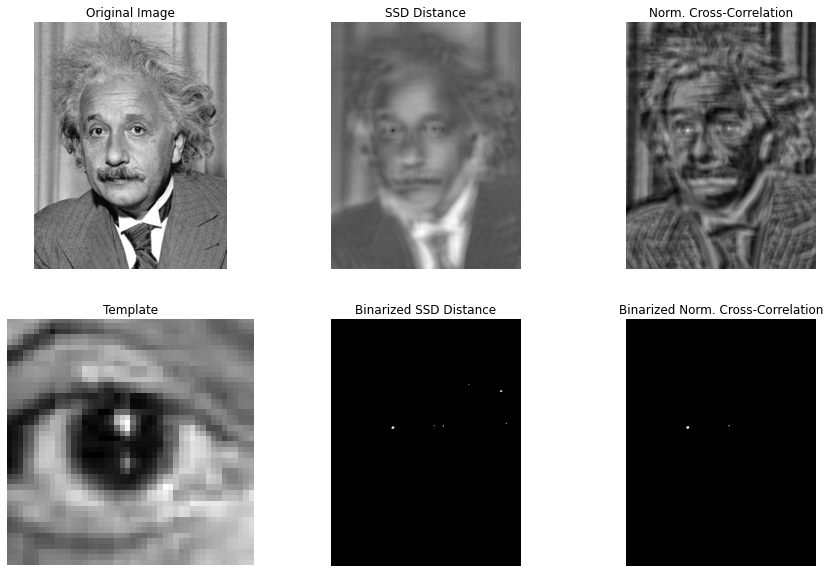

In [28]:
# Your solution here
%matplotlib inline

# reading images
eye = io.imread('./images/eye.png')
einstein = io.imread('./images/einstein.png')

# setting images to grayscale
eye = rgb2gray(rgba2rgb(eye))
einstein = rgb2gray(rgba2rgb(einstein))

# getting ssd distance image and binarized ssd distance image
# using threshold = 8.6 wich gives us the best aproach to diplayed example
ssd_img, bz_ssd_img = ssd_distance(einstein, eye, 8.6) 
# getting ncc image and binarized ncc image
# using threshold = .55 wich gives us the best aproach to diplayed example
ncc_img, bz_ncc_img = normalized_cross_correlation(einstein, eye, .55)

# showing images
images = [einstein, ssd_img, ncc_img, eye, bz_ssd_img, bz_ncc_img]
titles = ['Original Image', 'SSD Distance', 'Norm. Cross-Correlation','Template', 'Binarized SSD Distance', 'Binarized Norm. Cross-Correlation']

show_images(images, titles)


In [29]:
print('minimum SSD: ', ssd_img.min(), '\n', 'maximum NCC: ', ncc_img.max())

minimum SSD:  1.9895304595412764 
 maximum NCC:  0.9768202443115026


**1.2** How does the result of the template matching change if the image changes its contrast (for example if you make it clearer or darker)? 

Similarly to the previous case, please, visualize the euclidean distance and normalized cross-correlation images as well as the binarized (thresholded) images in the two cases.

**Note:** Use titles of the figures to explain what is displayed.


Read `einstein_br.png` and display the results on this image, using `eye.png` as template:

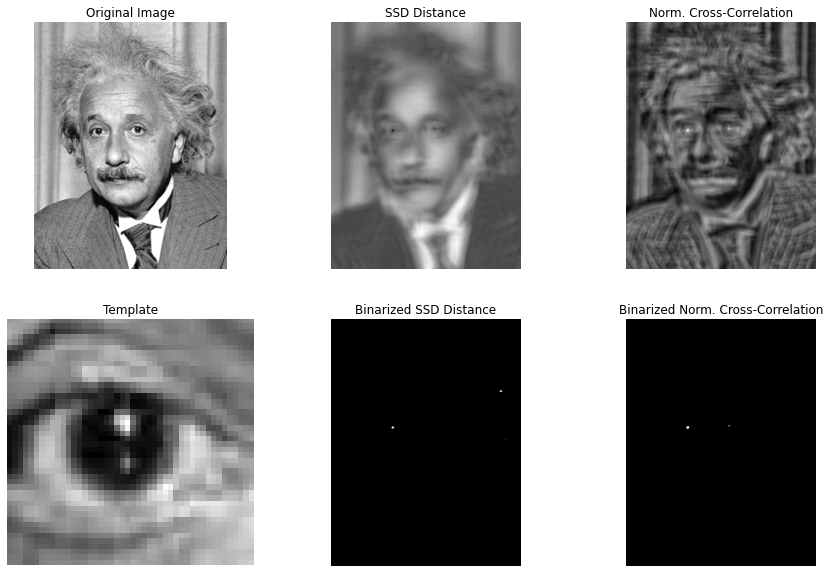

In [30]:
# Your solution here
einstein_br = io.imread("./images/einstein_br.png")
einstein_br = einstein_br

# getting ssd distance image and binarized ssd distance image
# using threshold = 8.6 wich gives us the best aproach to diplayed example
ssd_img, bz_ssd_img = ssd_distance(einstein_br, eye, 8.6) 
# getting ncc image and binarized ncc image
# using threshold = .55 wich gives us the best aproach to diplayed example
ncc_img, bz_ncc_img = normalized_cross_correlation(einstein_br, eye, .55)

# showing images
images = [einstein_br, ssd_img, ncc_img, eye, bz_ssd_img, bz_ncc_img]
titles = ['Original Image', 'SSD Distance', 'Norm. Cross-Correlation','Template', 'Binarized SSD Distance', 'Binarized Norm. Cross-Correlation']

show_images(images, titles)


Print the minimum SSD and the maximum Normalized Cross-Correlation (NCC)

In [31]:
# Your solution here
print('minimum SSD: ', ssd_img.min(), '\n', 'maximum NCC: ', ncc_img.max())

minimum SSD:  3.0698531963845404 
 maximum NCC:  0.9768232838639557


**1.3** Read `einstein_mask.png` and display the results on this image, using the `eye.png` template:

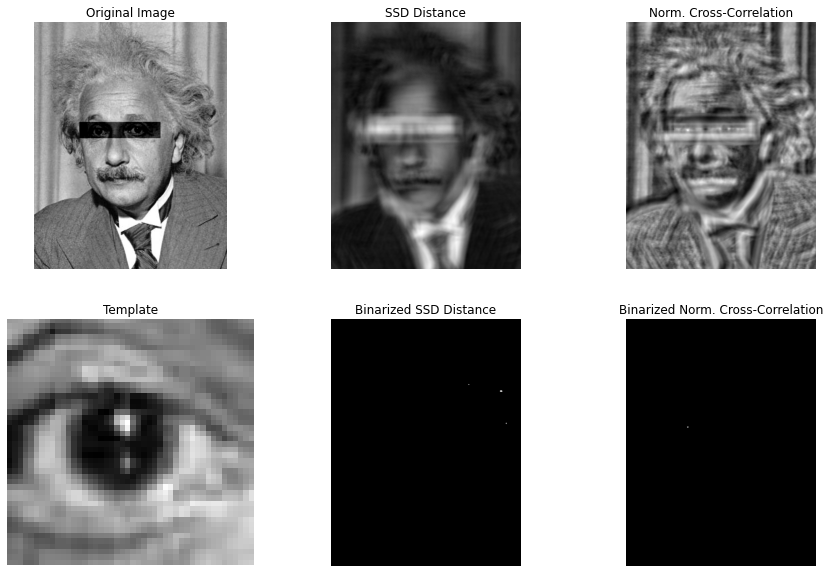

In [32]:
# Your solution here
einstein_mask = io.imread("images/einstein_mask.png")

# getting ssd distance image and binarized ssd distance image
# using threshold = 8.6 wich gives us the best aproach to diplayed example
ssd_img, bz_ssd_img = ssd_distance(einstein_mask, eye, 8.6) 
# getting ncc image and binarized ncc image
# using threshold = .55 wich gives us the best aproach to diplayed example
ncc_img, bz_ncc_img = normalized_cross_correlation(einstein_mask, eye, .55)

# showing images
images = [einstein_mask, ssd_img, ncc_img, eye, bz_ssd_img, bz_ncc_img]
titles = ['Original Image', 'SSD Distance', 'Norm. Cross-Correlation','Template', 'Binarized SSD Distance', 'Binarized Norm. Cross-Correlation']

show_images(images, titles)

Print the minimum SSD and the maximum NCC

In [33]:
# Your solution here
print('minimum SSD: ', ssd_img.min(), '\n', 'maximum NCC: ', ncc_img.max())

minimum SSD:  8.27263708944657 
 maximum NCC:  0.6166362739337297


>**What are the distances between the template and the image around the eyes of the image?** </p>
They will be pixels where there is possibly a match, but without being a match

> **Comment the template matching process:** </p>
**- Is the algorithms affected by contrast changes in the image?**</p> 
Yes, it is affected by the contrast, but it is less affected than the ssd method</p>
**- How do metrics (i.e. minimum euclidean distance and maximum NCC) change in all previous cases? Is there a big difference among these values?**</p>
***orig:***</p>
minimum SSD:  1.9895304595412764</p> 
maximum NCC:  0.9768202443115026</p>
***brighter:***</p>
minimum SSD:  3.0698531963845404 </p>
maximum NCC:  0.9768232838639557</p>
***mask:***</p>
minimum SSD:  8.27263708944657 </p>
maximum NCC:  0.6166362739337297</p>
we see that in the one wich te entire image in wich we are searching the template, is a bit brighter the ssd changes (cause we are comparing the mask wich is darker than the image to the image wich is brighter so the distance between the values of each pixel will be different) but the ncc does not change. It happens cause ncc is less affected by changes in ilumination. If the image is clear enough (has enough contrast) it will work (as we see in the mask one, the contrast is very low, it means it does not have so much different tones of gray, so the image is less clear, and both two methods' metrics change substantially), meanwhile ssd distance method is more sensible to changes in the image as we said before because distances will be different.</p>
**- What parameters it has and which measure for image comparisons works better.**</p>
Parameters of match_template:</p>
***pad_inputbool:*** If True, pad image so that output is the same size as the image, and output values correspond to the template center. Otherwise, the output is an array with shape (M m + 1, N - n + 1) for an (M, N) image and an (m, n) template, and matches correspond to origin (top-left corner) of the template.</p>
***modesee:*** add Padding mode.</p>
***constant_values:*** Constant values used in conjunction with mode='constant'.</p>
We think that normalized cross-correlation(NCC) is better than sum of squared differences(SSD)

**1.4** How does the result of the template matching change if instead the template is the one that changes its contrast (for example if you make it clearer or darker)? To this purpose, use the `eye_br.png` template.

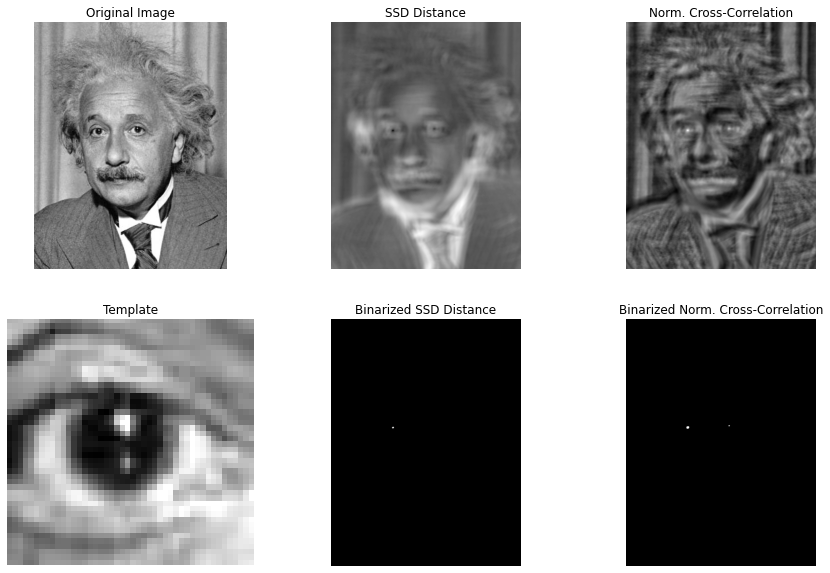

In [9]:
# Your solution here
eye_br = io.imread("images/eye_br.png")

# getting ssd distance image and binarized ssd distance image
# using threshold = 8.6 wich gives us the best aproach to diplayed example
ssd_img, bz_ssd_img = ssd_distance(einstein, eye_br, 8.6) 
# getting ncc image and binarized ncc image
# using threshold = .55 wich gives us the best aproach to diplayed example
ncc_img, bz_ncc_img = normalized_cross_correlation(einstein, eye_br, .55)

# showing images
images = [einstein, ssd_img, ncc_img, eye_br, bz_ssd_img, bz_ncc_img]
titles = ['Original Image', 'SSD Distance', 'Norm. Cross-Correlation','Template', 'Binarized SSD Distance', 'Binarized Norm. Cross-Correlation']

show_images(images, titles)

Check how the result changes if the template is rotated.

Visualize the template and its rotation by 2º, 5º, 10º, 15º and 20º. Obtain again the template matching using the Euclidean distance and normalized cross-correlation.

**Help:** use the function rotate() in skimage.transform

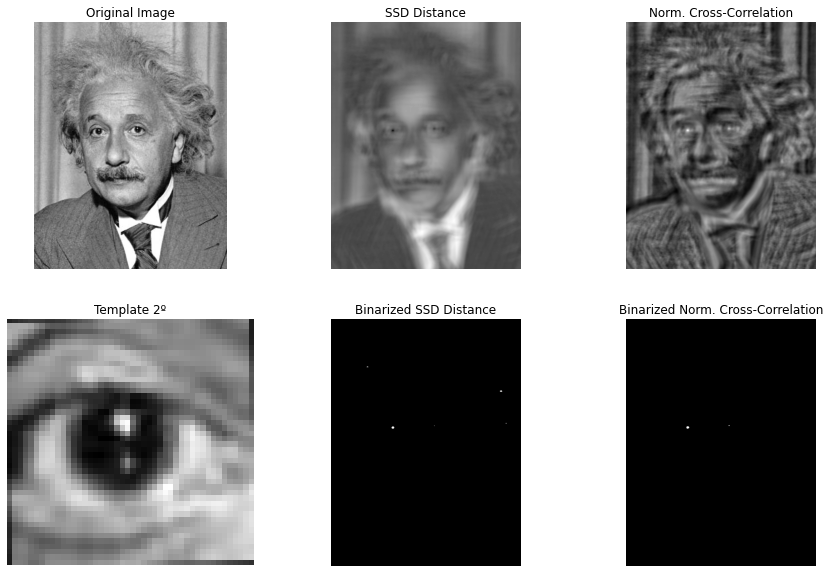

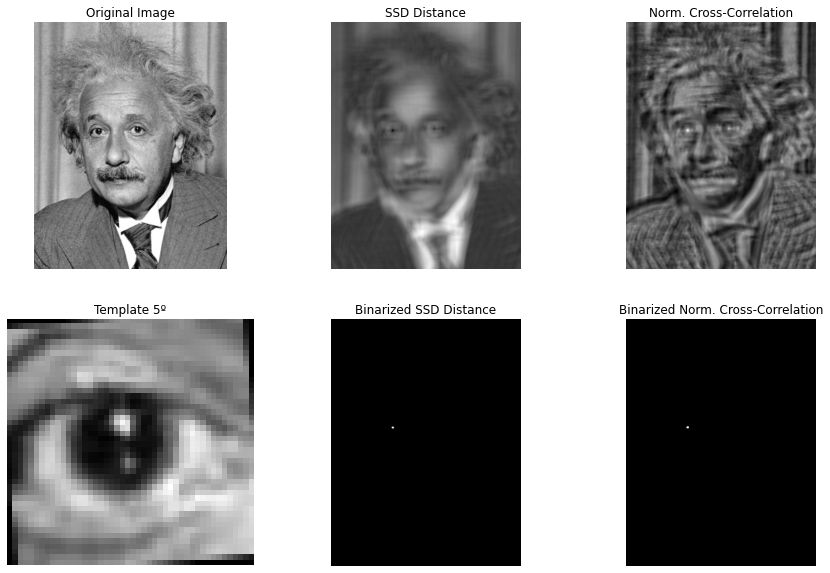

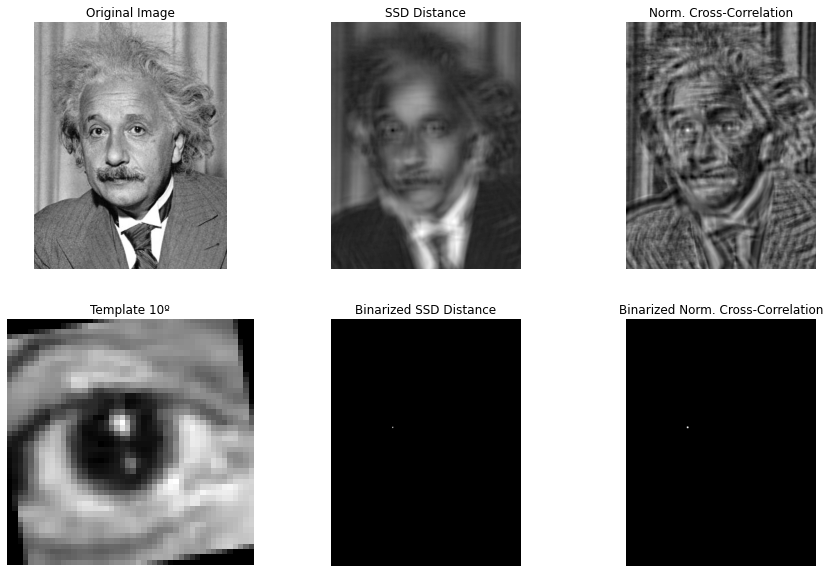

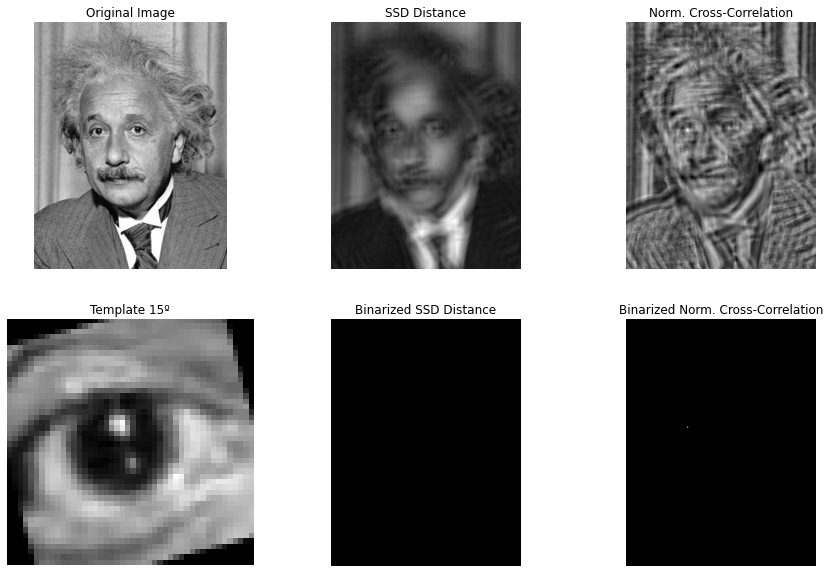

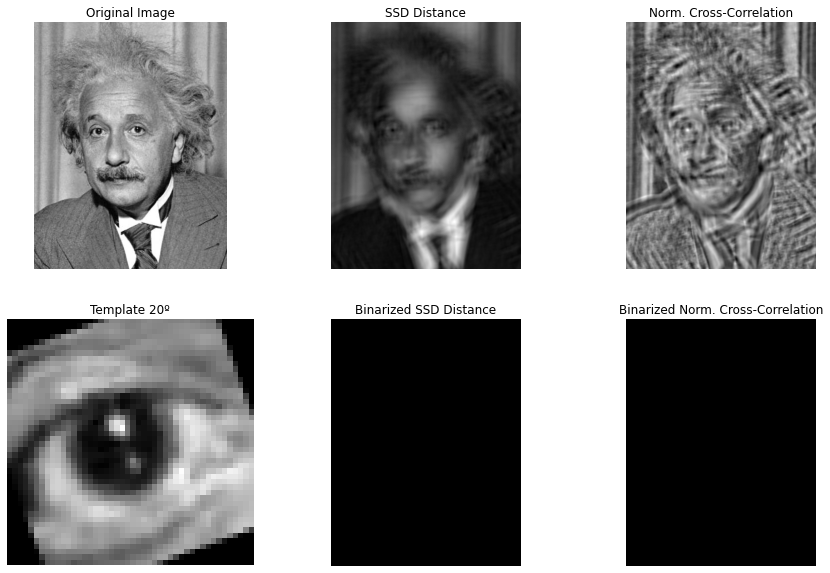

In [10]:
# Your solution here
eye_2 = rotate(eye, 2)

# getting ssd distance image and binarized ssd distance image
# using threshold = 8.6 wich gives us the best aproach to diplayed example
ssd_img, bz_ssd_img = ssd_distance(einstein, eye_2, 8.6) 
# getting ncc image and binarized ncc image
# using threshold = .55 wich gives us the best aproach to diplayed example
ncc_img, bz_ncc_img = normalized_cross_correlation(einstein, eye_2, .55)

# showing images
images = [einstein, ssd_img, ncc_img, eye_2, bz_ssd_img, bz_ncc_img]
titles = ['Original Image', 'SSD Distance', 'Norm. Cross-Correlation','Template 2º', 'Binarized SSD Distance', 'Binarized Norm. Cross-Correlation']
show_images(images, titles)
# -----------------------------------------------------------------------------------

eye_5 = rotate(eye, 5)

# getting ssd distance image and binarized ssd distance image
# using threshold = 8.6 wich gives us the best aproach to diplayed example
ssd_img, bz_ssd_img = ssd_distance(einstein, eye_5, 8.6) 
# getting ncc image and binarized ncc image
# using threshold = .55 wich gives us the best aproach to diplayed example
ncc_img, bz_ncc_img = normalized_cross_correlation(einstein, eye_5, .55)

# showing images
images = [einstein, ssd_img, ncc_img, eye_5, bz_ssd_img, bz_ncc_img]
titles = ['Original Image', 'SSD Distance', 'Norm. Cross-Correlation','Template 5º', 'Binarized SSD Distance', 'Binarized Norm. Cross-Correlation']
show_images(images, titles)
# -----------------------------------------------------------------------------------

eye_10 = rotate(eye, 10)

# getting ssd distance image and binarized ssd distance image
# using threshold = 8.6 wich gives us the best aproach to diplayed example
ssd_img, bz_ssd_img = ssd_distance(einstein, eye_10, 8.6) 
# getting ncc image and binarized ncc image
# using threshold = .55 wich gives us the best aproach to diplayed example
ncc_img, bz_ncc_img = normalized_cross_correlation(einstein, eye_10, .55)

# showing images
images = [einstein, ssd_img, ncc_img, eye_10, bz_ssd_img, bz_ncc_img]
titles = ['Original Image', 'SSD Distance', 'Norm. Cross-Correlation','Template 10º', 'Binarized SSD Distance', 'Binarized Norm. Cross-Correlation']
show_images(images, titles)
# -----------------------------------------------------------------------------------

eye_15 = rotate(eye, 15)
# getting ssd distance image and binarized ssd distance image
# using threshold = 8.6 wich gives us the best aproach to diplayed example
ssd_img, bz_ssd_img = ssd_distance(einstein, eye_15, 8.6) 
# getting ncc image and binarized ncc image
# using threshold = .55 wich gives us the best aproach to diplayed example
ncc_img, bz_ncc_img = normalized_cross_correlation(einstein, eye_15, .55)

# showing images
images = [einstein, ssd_img, ncc_img, eye_15, bz_ssd_img, bz_ncc_img]
titles = ['Original Image', 'SSD Distance', 'Norm. Cross-Correlation','Template 15º', 'Binarized SSD Distance', 'Binarized Norm. Cross-Correlation']
show_images(images, titles)
# -----------------------------------------------------------------------------------

eye_20 = rotate(eye, 20)
# getting ssd distance image and binarized ssd distance image
# using threshold = 8.6 wich gives us the best aproach to diplayed example
ssd_img, bz_ssd_img = ssd_distance(einstein, eye_20, 8.6) 
# getting ncc image and binarized ncc image
# using threshold = .55 wich gives us the best aproach to diplayed example
ncc_img, bz_ncc_img = normalized_cross_correlation(einstein, eye_20, .55)

# showing images
images = [einstein, ssd_img, ncc_img, eye_20, bz_ssd_img, bz_ncc_img]
titles = ['Original Image', 'SSD Distance', 'Norm. Cross-Correlation','Template 20º', 'Binarized SSD Distance', 'Binarized Norm. Cross-Correlation']
show_images(images, titles)



>**Comment the template matching process:**</p>
**- Please, explain briefly the algorithm, including advantages and disadvantages**</p>
The match_template method uses the fast, normalized cross-correlation to find a match of the template in the image, the maximum value of the result will correspond to the location of the template within the image.
The normalized cross correlation(NCC) (that uses match_template) is less sensitive to mask variance. On the other hand, it is variant to rotation changes</p>
**- Is the algorithms affected by contrast changes in the template image?**</p>
Yes, it is. But NCC is less sensitive to this changes than SSD. Both are also affected by rotation of the template.</p>
**- What parameters it has and which measure for image comparisons works better.**</p>
Parameters:</p>
***pad_inputbool:*** If True, pad image so that output is the same size as the image, and output values correspond to the template center. Otherwise, the output is an array with shape (M m + 1, N - n + 1) for an (M, N) image and an (m, n) template, and matches correspond to origin (top-left corner) of the template.</p>
***modesee:*** add Padding mode.</p>
***constant_values:*** Constant values used in conjunction with mode='constant'.</p>
We still think that normalized cross-correlation(NCC) is better than sum of squared differences(SSD).</p>

In [11]:
# Your solution here

# 2 Histogram of Oriented Gradients

In this section we will treat the following topic: HOG image descriptor. Application to person detection.

The Histogram of Oriented Gradients (HOG) feature descriptor is classical image descriptor for object detection.

Given the image `person_template.bmp` and the folder `/images/TestPersonImages/`, apply the HOG descriptor in order to detect where there is a person in the images. To this purpose, apply the "sliding window" technique. We use images from GRAZ 01 data from [INRIA datasets](http://pascal.inrialpes.fr/data/human/).

**2.1.** Read the template (`person_template.bmp`), obtain its HOG descriptor (with the optimal parameters) and visualize it.

Help: the HOG detector function is in the skimage.feature library ([Help](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py)).

In [12]:
# Your solution here


**2.2.** Apply the HOG descriptor on the complete set of images for person detection.

a) Read images from the folder "TestPersonImages", slide a window on each image, obtain the HOG descriptor and compare to the HOG descriptor of the person template. 

b) Visualize the location in the image that is the most similar to the person template using the distance between the template and test image descriptors.

Display the results of every person detection following this format:

<img src="images_notebook/hog.png" width="800" height="300">

In [13]:
# Your solution here

What is the dimension of your HOG descriptor? Explain it.

In [14]:
# Your solution here

Count on how many images were the persons detected correctly and discuss the failures.
What do you think can be the reasons for the failures?

In [15]:
# Your solution here

Test several values of the parameters (``orientations``, ``pixels_per_cell``, ``cells_per_block``) to show which are the optimal values for the person detection problem.

In [16]:
# Your solution here

Comment the object detection process:
* Please, explain briefly the algorithm, including advantages and disadvantage
* Do you see any advantages of the HOG-based object detector compared to the template-based object detection? (The answer should be up to 10-15 lines).

In [17]:
# Your solution here

# 3 ORB feature detector and binary descriptor

Let us consider the problem of feature extraction that contains two subproblems: 
- feature location, 
- image feature description.

Let us focus on ORB, an approximation of SIFT method, and analyse if ORB is  scale and rotation invariant, a property that is very important for real-time applications.

**Hint:** `ORB` is a function within the module `skimage.feature`
                             
**Help**: We suggest to have a look at the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) how to compute the ORB descriptors and find the descriptors match. You can use the function match_descriptors from `skimage.feature` module in order to compute and show the similar detected descriptors of the given images. 

**3.1** Detect the censure in the image `starbucks4.jpg`. Analyze and discuss the effect of different values of the parameters in censure function.

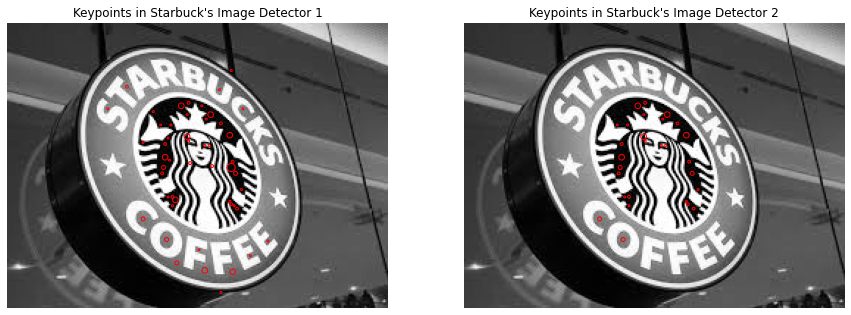

In [34]:
# Your solution here
starbucks = io.imread("images/starbucks4.jpg")
starbucks = rgb2gray(starbucks)

# Dettecting with censure function
'''
Comentar los diferentes parametros usados
Non-max: Remove redundant points, the lower the value, the more points there will be
line_threshold: Threshold for rejecting interest points which have ratio of principal curvatures greater than this value
'''
# Create censure changing differents parameters
detector = CENSURE(non_max_threshold = .25, line_threshold = 20)
detector.detect(starbucks)

detector2 = CENSURE(non_max_threshold = .3, line_threshold = 10)
detector2.detect(starbucks)

# Struct
fig, ax = plt.subplots(1, 2, figsize=(15,15))
ax[0].imshow(starbucks, cmap='gray')
# Showing dots
ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
                2 ** detector.scales, facecolors='none', edgecolors='r')
ax[0].axis('off')
ax[0].set_title("Keypoints in Starbuck's Image Detector 1")

ax[1].imshow(starbucks, cmap='gray')
# Showing dots
ax[1].scatter(detector2.keypoints[:, 1], detector2.keypoints[:, 0],
                2 ** detector2.scales, facecolors='none', edgecolors='r')
ax[1].axis('off')
ax[1].set_title("Keypoints in Starbuck's Image Detector 2")

plt.show()

**3.2** Detect the correspondences between the model image `starbucks.jpg` with the scene image `starbucks4.jpg`. You can adapt the code from the [ORB example](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html) above. 

Define a function get_ORB implementing the algorithm in order to be able to apply it on different images. Comment the code in detail.

**Hint: If the function plot_matches() gives you an error you can use the plot_matches_aux() at the end of this file.**

Analyze and discuss the effect of different values of the parameter `max_ratio` in the match_descriptors function.


In [19]:
# Your solution here

Repeate the experiment comparing the `starbucks.jpg` image as a model, and showing its matches to all Starbucks images, sorting them based on their similarity to the model. Comment when does the algorithm work better. 

In [20]:
# Your solution here

**3.3** Repeate the experiment: 
- Changing the orientation of the model image by rotating it and comparing it with its original version. Help: you can use the rotate() function from skimage.transform 
- Change the scale and orientation of the scene image and compare it with the model image.

**Help:** To do so, you can use the function given below as example:

```
import transform as tf
rotationdegrees = 180
img_rotated = tf.rotate(image2transform, rotationdegrees)
```

or

```
tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img_transformed = tf.warp(image2transform, tform)
```

In [21]:
# Your solution here

**(Optional)** Repeat the experiment (3.1 to 3.3) with a new group of images. You could use Coca-Cola advertisements or from another famous brand, easily to find on internet.


In [22]:
# Your solution here

**3.4** Analysis of the applied techniques and results

- What are the advantages of the ORB object detection with respect to the HOG and template object detector?

- What would happen if you analyse an image that does not contain the Starbucks logo? 

- Could you think of ways of defining a quality measure for the correspondance between two images? (no need of implementing it) 

In [23]:
# Your solution here

### Appendix

In [25]:
# In case the plot_matches() function gives you some problems, you can use the following one:

from skimage.util import img_as_float
import numpy as np

def plot_matches_aux(ax, image1, image2, keypoints1, keypoints2, matches,
                 keypoints_color='k', matches_color=None, only_matches=False):
    """Plot matched features.
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Matches and image are drawn in this ax.
    image1 : (N, M [, 3]) array
        First grayscale or color image.
    image2 : (N, M [, 3]) array
        Second grayscale or color image.
    keypoints1 : (K1, 2) array
        First keypoint coordinates as ``(row, col)``.
    keypoints2 : (K2, 2) array
        Second keypoint coordinates as ``(row, col)``.
    matches : (Q, 2) array
        Indices of corresponding matches in first and second set of
        descriptors, where ``matches[:, 0]`` denote the indices in the first
        and ``matches[:, 1]`` the indices in the second set of descriptors.
    keypoints_color : matplotlib color, optional
        Color for keypoint locations.
    matches_color : matplotlib color, optional
        Color for lines which connect keypoint matches. By default the
        color is chosen randomly.
    only_matches : bool, optional
        Whether to only plot matches and not plot the keypoint locations.
    """

    image1 = img_as_float(image1)
    image2 = img_as_float(image2)

    new_shape1 = list(image1.shape)
    new_shape2 = list(image2.shape)

    if image1.shape[0] < image2.shape[0]:
        new_shape1[0] = image2.shape[0]
    elif image1.shape[0] > image2.shape[0]:
        new_shape2[0] = image1.shape[0]

    if image1.shape[1] < image2.shape[1]:
        new_shape1[1] = image2.shape[1]
    elif image1.shape[1] > image2.shape[1]:
        new_shape2[1] = image1.shape[1]

    if new_shape1 != image1.shape:
        new_image1 = np.zeros(new_shape1, dtype=image1.dtype)
        new_image1[:image1.shape[0], :image1.shape[1]] = image1
        image1 = new_image1

    if new_shape2 != image2.shape:
        new_image2 = np.zeros(new_shape2, dtype=image2.dtype)
        new_image2[:image2.shape[0], :image2.shape[1]] = image2
        image2 = new_image2

    image = np.concatenate([image1, image2], axis=1)

    offset = image1.shape

    if not only_matches:
        ax.scatter(keypoints1[:, 1], keypoints1[:, 0],
                   facecolors='none', edgecolors=keypoints_color)
        ax.scatter(keypoints2[:, 1] + offset[1], keypoints2[:, 0],
                   facecolors='none', edgecolors=keypoints_color)

    ax.imshow(image, interpolation='nearest', cmap='gray')
    ax.axis((0, 2 * offset[1], offset[0], 0))

    for i in range(matches.shape[0]):
        idx1 = matches[i, 0]
        idx2 = matches[i, 1]

        if matches_color is None:
            color = np.random.rand(3)
        else:
            color = matches_color

        ax.plot((keypoints1[idx1, 1], keypoints2[idx2, 1] + offset[1]),
                (keypoints1[idx1, 0], keypoints2[idx2, 0]),
                '-', color=color)